# Graph Isomorphism Algorithm
by Akeem Jokosenumi
Student ID: G00366442

## What is Graph Isomorphism

Graph isomorphism is a graph equivalence relation that divides all graph classes into equivalence classes. An isomorphism class of graphs is a collection of graphs that are isomorphic to each other.

At the same time, isomorphism for many special classes of graphs can be solved in polynomial time, and in practice graph isomorphism can often be solved efficiently.[2][3]

When 2 vertices are connected by an edge we call them adjacent, In the context of graphs, isomorphism refers to a bijection that maintains adjacency when two vertices are joined by an edge. A bijection is a mapping that goes from one to the other and back again.

Therefore, if two graphs are isomorphic, we may map one to the other by assigning each vertex in one graph to a vertex in the other graph. By doing this, the adjacency is preserved, and we end up with the same edges and relation between the two graphs.

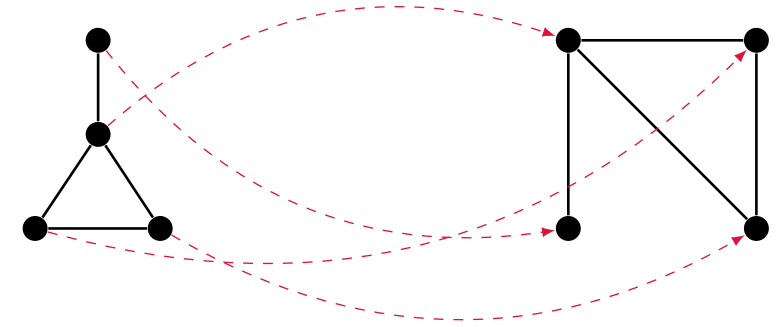

## Python program for implementation of Graph Isomorphism

This code is being used to check if the graphs are either isomorphic or not.

You can say given graphs are isomorphic if they have:<br>
Equal number of vertices.<br>
Equal number of edges.<br>
Same degree sequence.<br>
Same number of circuit of particular length.

In [21]:
# Plots.
import matplotlib.pyplot as plt

#Resize Plots
plt.rcParams['figure.figsize'] = (6, 6)

# Matrices.
import numpy as np

# Permutations
import itertools as it

# Graphs.
import networkx as nx

# Math.
import math

# Networkx drawing parameters.
params = {'node_color': 'lightskyblue', 'node_size': 800, 'font_size': 18, 'with_labels': True}

In [70]:
#Gets 2 matrices and check if their degree are equal.
def degree(matrice):
    
    a = []
    
    #Loop Size
    for j in range(len(matrice)):
        
        a.append(sum(matrice[j]))
        
    #reverse the array and return it
    
    a.sort(reverse=True)
    
    return a

#Checks the length

def sort(matrice):
    
    # If not, returns -1 
    if len(matrice) != len(matrice[0]):
        
        return -1
    else:
        
        # return length
        return len(matrice)
    
#get the permutation of passed matrice
def permutation(matrice):
    
    #array
    m = []
    
    ar = list(range(len(matrice)))
    
    #combos
    combination = [
        list(i) for i in itertools.permutations(ar, len(ar))
    ]
    
    # goes through the combinations and exchange pkace them in arrays
    for ar_c in combination:
        
        k = matrice
        
        k = k[ar_c]
        
        k = np.transpose(np.transpose(k)[ar_c])
        
        # adds to array
        m.append({
            
            "perm_v":
            
            ar_c,
            
            "a_m":
            
            k
        })
        
    #return array
    return m
        
    
# main function
def checkIso(matrice1, matrice2):
    
    # gets degree sequnces
    seq1 = degree(matrice1)
    
    seq2 = degree(matrice2)
    
    
    # checks order function
    if sort(matrice1) != sort(matrice2):
        
        # Not isomorphic
        return False
    
   
    elif np.array_equal(seq1, seq2) == False:
        # Not isomorphic
        return False
    
    # if the two above checks pass
    else:
        for a_m in list(
            
                map(lambda matrice: matrice["a_m"],
                    
                    #permutations of the second matrix for comparison.
                    
                    permutation(matrice2))):
            
            if np.array_equal(matrice1, a_m) == True:
                
                # We have all match returns true
                return True
            
    # else returns false
    return False  

# To Check if two graphs are isomorphic

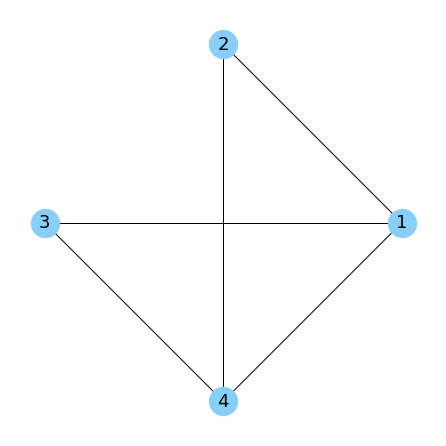

In [74]:
# two graphs
g = nx.Graph()

gx = nx.Graph()

# creates the edges
E = ( (1,2), (1,3),(1,4),(2,4),(3,4),(4,1))
E2 = ( (3,1), (3,4), (3,2), (2,3), (1,2),(4,2))

g.add_edges_from(E)

gx.add_edges_from(E2)

#Draw G
nx.draw_circular(g, **params)

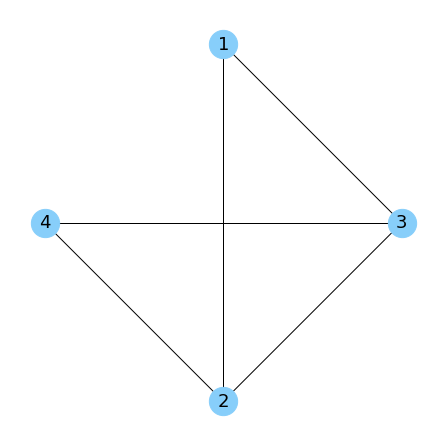

In [72]:
#draw graph 2
nx.draw_circular(gx, **params)

In [73]:
# This gets the matrices of the 2 graphs
M1 = nx.to_numpy_array(g).astype(np.uint8)
M2 = nx.to_numpy_array(gx).astype(np.uint8)

# checks if they are Isomorphic
checkIso(M1, M2)

True


## Checking that 2 graphs are Not Isomorphic

In [88]:
# two  graphs
g1 = nx.Graph()

g2 = nx.Graph()

#Create the edges

EX = ((0, 3) , (1, 5) , (2, 0) , (3, 1), (4, 0), (5,4))

EG = ((0, 4) , (1, 0) , (2, 5) , (3, 2), (4, 3), (5,1) )

# add the edges
g1.add_edges_from(EX)

g2.add_edges_from(EG)

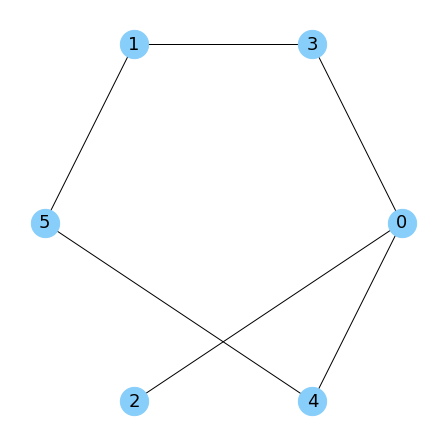

In [89]:
# draws graph 3
nx.draw_circular(g1, **params)

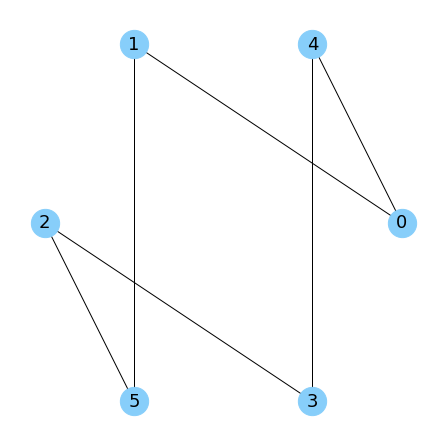

In [90]:
# draws graph 4
nx.draw_circular(g2, **params)

In [91]:
# This gets the matrices of the 2 graphs
M1 = nx.to_numpy_array(g1).astype(np.uint8)
M2 = nx.to_numpy_array(g2).astype(np.uint8)

# checks if they are Isomorphic
checkIso(M1, M2)

False

## Adjacency List in Python

In [92]:
# Adjascency List representation in Python


class AdjNode:
    def __init__(self, value):
        self.vertex = value
        self.next = None


class Graph:
    def __init__(self, num):
        self.V = num
        self.graph = [None] * self.V

    # Add edges
    def add_edge(self, s, d):
        node = AdjNode(d)
        node.next = self.graph[s]
        self.graph[s] = node

        node = AdjNode(s)
        node.next = self.graph[d]
        self.graph[d] = node

    # Print the graph
    def print_agraph(self):
        for i in range(self.V):
            print("Vertex " + str(i) + ":", end="")
            temp = self.graph[i]
            while temp:
                print(" -> {}".format(temp.vertex), end="")
                temp = temp.next
            print(" \n")


if __name__ == "__main__":
    V = 5

    # Create graph and edges
    graph = Graph(V)
    graph.add_edge(0, 1)
    graph.add_edge(0, 2)
    graph.add_edge(0, 3)
    graph.add_edge(1, 2)

    graph.print_agraph()

Vertex 0: -> 3 -> 2 -> 1 

Vertex 1: -> 2 -> 0 

Vertex 2: -> 1 -> 0 

Vertex 3: -> 0 

Vertex 4: 



## Adjacency Matrix in Python


An adjacency matrix is a way of representing a graph as a matrix of booleans (0's and 1's). A finite graph can be represented in the form of a square matrix on a computer, where the boolean value of the matrix indicates if there is a direct path between two vertices.

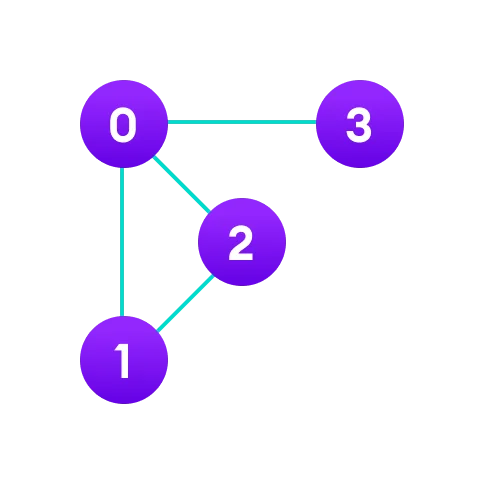

## We can represent this graph in matrix form like below.

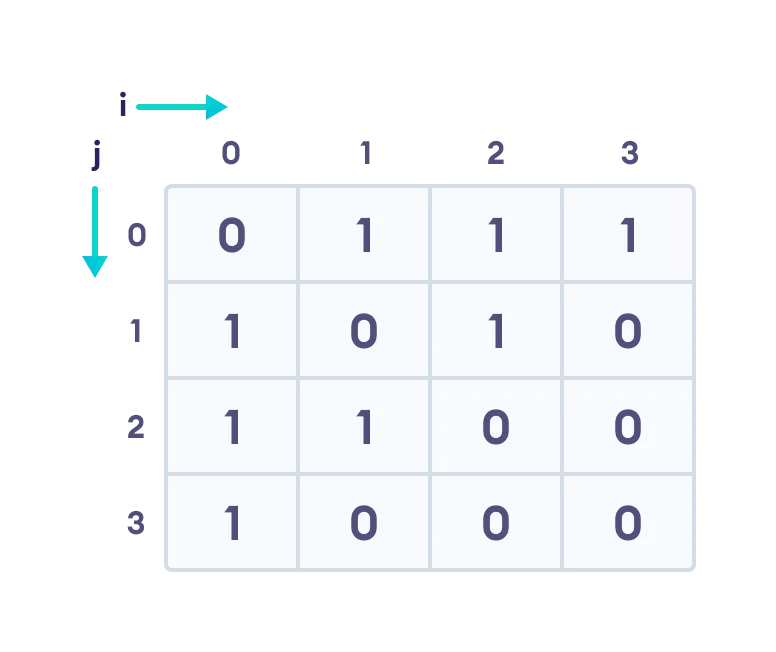

<b> Each cell in the above table/matrix is represented as Aij, where i and j are vertices. The value of Aij is either 1 or 0 depending on whether there is an edge from vertex i to vertex j.</b>

If there is a path from i to j, then the value of Aij is 1 otherwise its 0. For instance, there is a path from vertex 1 to vertex 2, so A12 is 1 and there is no path from vertex 1 to 3, so A13 is 0.

In case of undirected graphs, the matrix is symmetric about the diagonal because of every edge (i,j), there is also an edge (j,i).

<b>Adjacency Matrix Benefits</b><br>
The fundamental operations, such as adding an edge, removing an edge, and determining whether there is an edge connecting vertex I to vertex j, are all of constant time and are very time-efficient.
Adjacency matrices ought to be the first option in dense graphs with lots of edges. We can represent a sparse graph and adjacency matrix using data structures for sparse matrices.

<b>Cons of Adjacency Matrix</b><br>
The VxV space requirement of the adjacency matrix makes it a memory hog. Graphs out in the wild usually don't have too many connections and this is the major reason why adjacency lists are the better choice for most tasks.
While basic operations are easy, operations like inEdges and outEdges are expensive when using the adjacency matrix representation.


## Code Implementation

In [101]:
# Adjacency Matrix representation in Python


class Graph(object):

    # Initialize the matrix
    def __init__(self, size):
        self.adjMatrix = []
        for i in range(size):
            self.adjMatrix.append([0 for i in range(size)])
        self.size = size

    # Add edges
    def add_edge(self, v1, v2):
        if v1 == v2:
            print("Same vertex %d and %d" % (v1, v2))
        self.adjMatrix[v1][v2] = 1
        self.adjMatrix[v2][v1] = 1

    # Remove edges
    def remove_edge(self, v1, v2):
        if self.adjMatrix[v1][v2] == 0:
            print("No edge between %d and %d" % (v1, v2))
            return
        self.adjMatrix[v1][v2] = 0
        self.adjMatrix[v2][v1] = 0

    def __len__(self):
        return self.size

    # Print the matrix
    def print_matrix(self):
        for row in self.adjMatrix:
            for val in row:
                print('{:4}'.format(val)),
            print


def main():
    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(2, 0)
    g.add_edge(2, 3)

    g.print_matrix()


if __name__ == '__main__':
    main()

   0
   1
   1
   0
   0
   1
   0
   1
   0
   0
   1
   1
   0
   1
   0
   0
   0
   1
   0
   0
   0
   0
   0
   0
   0


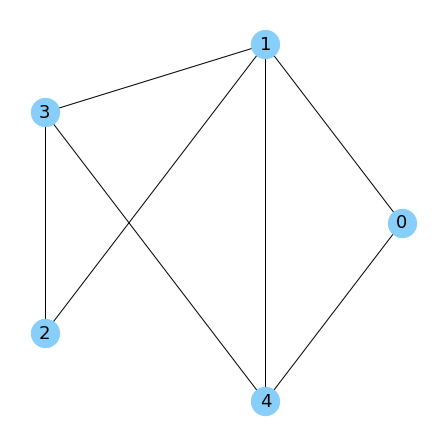

In [98]:
g = nx.Graph() # empty graph

e = ((0,1), (1,3), (2,1),(3,2),(3,1),(4,0),(4,1), (4,3)) #edges

g.add_edges_from(e)# add nodes

nx.draw_circular(g, **params) # draw graph

In [100]:
# Import numpy library.
import numpy as np


print("This matrix represents the relationships of the Graph above.")

# This matrix represents the relationships of the Graph above.
print(nx.to_numpy_array(g).astype(np.uint8))

This matrix represents the relationships of the Graph above.
[[0 1 0 0 1]
 [1 0 1 1 1]
 [0 1 0 1 1]
 [0 1 1 0 0]
 [1 1 1 0 0]]


# Complexity of the Graph Isomorphism Problem.

The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic. The problem is not known to be solvable in polynomial time nor to be NP-complete, and therefore may be in the computational complexity class NP-intermediate.


# References

https://www.programiz.com/dsa/graph-adjacency-matrix

https://link.springer.com/content/pdf/bbm%3A978-3-030-81885-2%2F1.pdf

https://www.geeksforgeeks.org/graph-and-its-representations/

https://math.stackexchange.com/questions/1868641/number-of-vertices-and-edges-of-two-isomorphic-graphs

https://calcworkshop.com/trees-graphs/isomorphic-graph/#:~:text=If%20we%20are%20given%20two,as%20noted%20by%20Columbia%20University.

https://en.wikipedia.org/wiki/Vertex_(graph_theory) 

https://en.wikipedia.org/wiki/Complexity_class

https://numpy.org/doc/

https://www.gatevidyalay.com/graph-isomorphism/#:~:text=Graph%20Isomorphism%20Conditions%2D&text=Number%20of%20vertices%20in%20both,the%20graphs%20must%20be%20same